In [1]:
from utils import *

# DECISION TREE

In [14]:
df, train, test, val = get_data(normalize=False, binary_label=True)

# Sklearn

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
test_model(clf, train, test, classification=True)


Time taken to train the model:  1.2613115310668945
Binary cross entropy: 15.046600166222445
Predicted mean: 0.5202421490730231 Actual mean: 0.5353764661369655
Accuracy: 0.5825450876529197


0.5825450876529197

Trying hyperparameters: 1
Time taken to train the model:  0.09212374687194824
Binary cross entropy: 14.831142258489006
Predicted mean: 0.5208891691628567 Actual mean: 0.527825949865994
Accuracy: 0.5885227810184456
Value: 0.5885227810184456
Trying hyperparameters: 2
Time taken to train the model:  0.1622624397277832
Binary cross entropy: 13.512818502178872
Predicted mean: 0.5237269430868674 Actual mean: 0.527825949865994
Accuracy: 0.6250985338168059
Value: 0.6250985338168059
Trying hyperparameters: 3
Time taken to train the model:  0.24366307258605957
Binary cross entropy: 13.012764663578478
Predicted mean: 0.5593567712438909 Actual mean: 0.527825949865994
Accuracy: 0.6389720952230805
Value: 0.6389720952230805
Trying hyperparameters: 4
Time taken to train the model:  0.3095710277557373
Binary cross entropy: 13.063906533435334
Predicted mean: 0.5888380892322245 Actual mean: 0.527825949865994
Accuracy: 0.6375532082610752
Value: 0.6375532082610752
Trying hyperparameters: 5
Time taken to tr

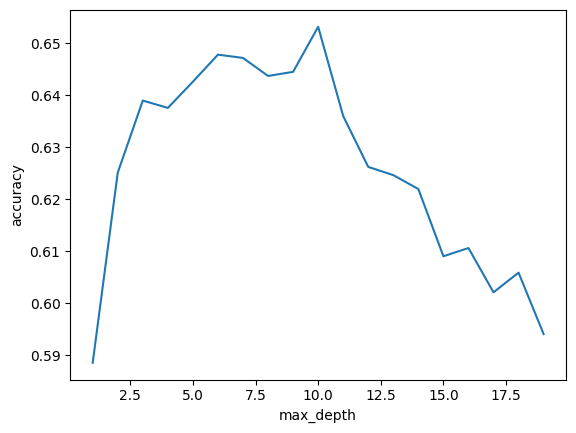

Time taken to train the model:  0.7217357158660889
Binary cross entropy: 12.841886848815228
Predicted mean: 0.5478622777147181 Actual mean: 0.5353764661369655
Accuracy: 0.6437129524530205


0.6437129524530205

In [19]:
def get_model(param):
    return tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 20), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')
best_model = get_model(param=best_param)
best_accuracy_DT_sk = test_model(best_model, train, test, classification=True)

## From scratch

In [20]:

import math
import numpy as np
from collections import Counter


class DecisionTreeClassifier:

    def __init__(self, max_depth=float('inf')):
        self.max_depth = max_depth
        self.root = None

    def fit(self, x, y):
        assert len(x) == len(y)
        assert len(x) != 0
        self.root = self._create_tree(x, y, None, self.max_depth)

    def _create_tree(self, data, labels, parent, max_depth):
        new_node = Node(None, None, parent)
        if not len(data):
            new_node.label = parent.label
            return new_node
        most_common_result = Counter(labels).most_common(1)[0][0]
        if len(labels) == 1 or data.shape[1] == 0:
            new_node.label = most_common_result
            return new_node
        if len(np.unique(labels)) == 1:
            new_node.label = labels[0]
            return new_node

        best_feature, best_threshold = self._find_best_split(data, labels)
        new_node = Node(best_feature, best_threshold, parent)

        if max_depth > 0:
            index = data[:, best_feature] <= best_threshold
            data_left = data[index]
            labels_left = labels[index]
            if len(data_left) == 0:
                new_node.label = most_common_result
            new_node.left_child = self._create_tree(data_left, labels_left, new_node, max_depth - 1)
            index = data[:, best_feature] > best_threshold
            data_right = data[index]
            labels_right = labels[index]
            if len(data_right) == 0:
                new_node.label = most_common_result
            new_node.right_child = self._create_tree(data_right, labels_right, new_node, max_depth - 1)
        else:
            new_node.label = most_common_result
            new_node.left_child = None
            new_node.right_child = None

        return new_node

    def _find_best_split(self, data, labels):
        best_gain = 0
        best_feature = None
        best_threshold = None
        for feature in range(data.shape[1]):
            threshold = np.median(data[:, feature])
            gain = self._information_gain(data, labels, feature, threshold)
            if gain >= best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, data, labels, feature, threshold):
        entropy_labels = self._entropy(labels)
        sample_left = labels[data[:, feature] <= threshold]
        sample_right = labels[data[:, feature] > threshold]

        information_gain = entropy_labels - \
                           len(sample_left) / len(data) * self._entropy(sample_left) - \
                           len(sample_right) / len(data) * self._entropy(sample_right)

        return information_gain

    def _entropy(self, labels):
        if len(labels) == 0:
            return 0
        p = sum(labels) / len(labels)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    def predict(self, data):
        predictions = []
        for row in data:
            node = self.root
            while node.label is None:
                if row[node.feature] <= node.threshold:
                    node = node.left_child
                else:
                    node = node.right_child
            predictions.append(node.label)

        return predictions


class Node:
    def __init__(self, feature, threshold, parent):
        self.feature = feature
        self.threshold = threshold
        self.parent = parent
        self.label = None
        self.left_child = None
        self.right_child = None


In [22]:
clf = DecisionTreeClassifier()
test_model(clf, train, test, classification=True)

Time taken to train the model:  17.38997769355774
Binary cross entropy: 15.292073401562629
Predicted mean: 0.5268003531340648 Actual mean: 0.5353764661369655
Accuracy: 0.5757346449741455


0.5757346449741455

Trying hyperparameters: 1
Time taken to train the model:  0.5889596939086914
Binary cross entropy: 14.8368246884731
Predicted mean: 0.4973987072363235 Actual mean: 0.527825949865994
Accuracy: 0.5883651269115561
Value: 0.5883651269115561
Trying hyperparameters: 2
Time taken to train the model:  0.9646711349487305
Binary cross entropy: 13.4787239222743
Predicted mean: 0.5120605391770455 Actual mean: 0.527825949865994
Accuracy: 0.6260444584581428
Value: 0.6260444584581428
Trying hyperparameters: 3
Time taken to train the model:  1.1524662971496582
Binary cross entropy: 12.984352513658
Predicted mean: 0.5478480214409586 Actual mean: 0.527825949865994
Accuracy: 0.639760365757528
Value: 0.639760365757528
Trying hyperparameters: 4
Time taken to train the model:  1.4438843727111816
Binary cross entropy: 12.916163353848855
Predicted mean: 0.5352356928897998 Actual mean: 0.527825949865994
Accuracy: 0.6416522150402018
Value: 0.6416522150402018
Trying hyperparameters: 5
Time taken to train the mod

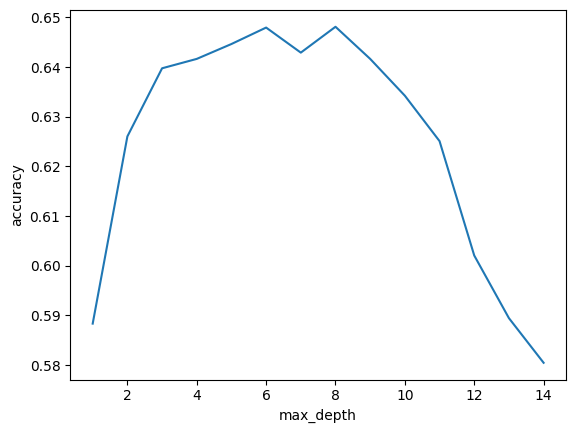

In [18]:
def get_model(param):
    return DecisionTreeClassifier(max_depth=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 15), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')
best_model = get_model(param=best_param)
best_accuracy_DT_my = test_model(best_model, train, test, classification=True)

### For the homeworks we are going to use the "[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#)"

The dataset can be used both for regression and classification tasks.

#### Source:

Kelwin Fernandes INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela Universidade de Aveiro

#### Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


The first two columns (url and time_delta) are non-predictive and should be ignored

The last column **shares** contains the value to predict.

### Regression
In the case of regression we want to predict the value of the share column.

### Classification
In the case of classification we want to predict one of two classes:

* *low* -- shares < 1,400
* *high* -- shares >= 1,400

### Metrics

#### Regression
To evaluate how good we are doing on the **regression** task we will use the Root Mean Squared Error (RMSE). RMSE is given by

$$
\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{\Big(d_i -f_i\Big)^2}}
$$


where:

* $n$ is the number of test samples
* $d_i$ is the ground truth value of the i-th sample
* $f_i$ is the predicted value of the i-th sample


#### Classification
To evaluate how good we are doing on the **classification** task we will use the accuracy metrics. Accuracy is given by

$$
\frac{TP+TN}{TP+TN+FP+FN}
$$

where:

* TP is the number of *correctly* classified positive samples
* TN is the number of *correctly* classified negative samples
* FP is the number of *incorrectly* classified positive samples
* FN is the number of *incorrectly* classified negative samples

In [5]:
from __future__ import annotations

import math
import time

from pandas import DataFrame
import pandas as pd
import random
from sklearn.metrics import accuracy_score
import numpy as np


In [2]:
# !wget https: // archive.ics.uci.edu / ml / machine-learning-databases / 00332 / OnlineNewsPopularity.zip
# !unzip OnlineNewsPopularity.zip

Format properly the names of the columns and remove the first two columns

In [7]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.iloc[:, 2:]

## Let's plot some of the columns

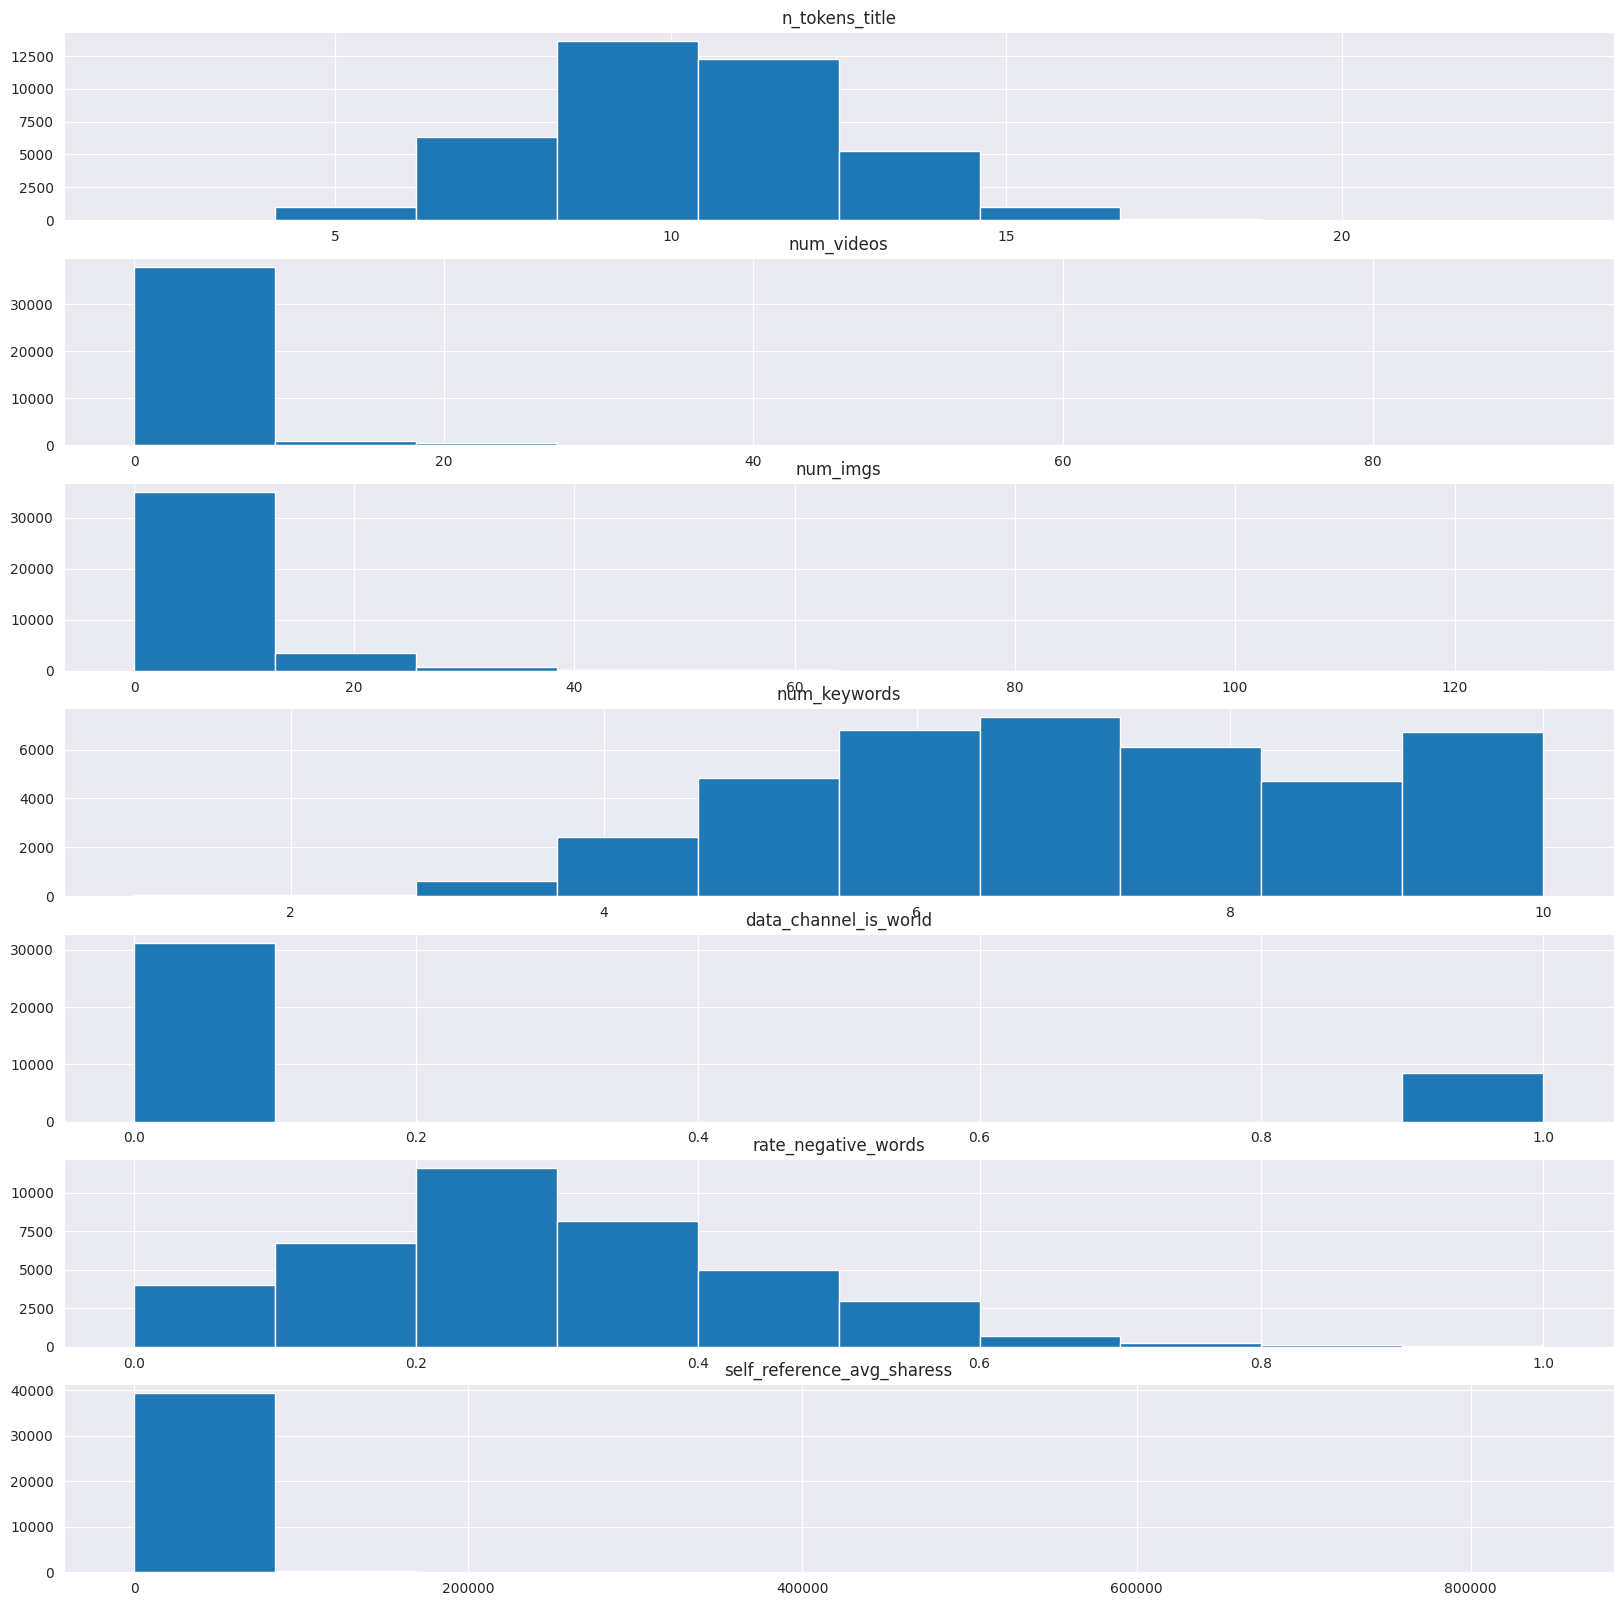

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    'n_tokens_title',
    'num_videos',
    'num_imgs',
    'num_keywords',
    'data_channel_is_world',
    'rate_negative_words',
    'self_reference_avg_sharess',
]

fig, ax = plt.subplots(len(columns_to_plot), 1, figsize=(20, 20))

for i, column in enumerate(columns_to_plot, 0):
    ax[i].hist(df[column])
    ax[i].title.set_text(column)

plt.show()

In [76]:
#calculate median for each column
median = df.median(axis=0)
avg = df.mean(axis=0)
print(avg)
print(median)
# compute the median of each attribute
medians = df.median()

# discretize each attribute to 0 or 1 based on the median
# for column in df.columns:
#     df[column] = (df[column] >= medians[column]).astype(int)

n_tokens_title                       10.398749
n_tokens_content                    546.514731
n_unique_tokens                       0.548216
n_non_stop_words                      0.996469
n_non_stop_unique_tokens              0.689175
num_hrefs                            10.883690
num_self_hrefs                        3.293638
num_imgs                              4.544143
num_videos                            1.249874
average_token_length                  4.548239
num_keywords                          7.223767
data_channel_is_lifestyle             0.052946
data_channel_is_entertainment         0.178009
data_channel_is_bus                   0.157855
data_channel_is_socmed                0.058597
data_channel_is_tech                  0.185299
data_channel_is_world                 0.212567
kw_min_min                           26.106801
kw_max_min                         1153.951682
kw_avg_min                          312.366967
kw_min_max                        13612.354102
kw_max_max   

In [8]:
from sklearn.model_selection import train_test_split

data = np.array(df)
x = data[:, :-1]
# converting the last column to boolean
y = np.array([elem >= 1400 for elem in data[:, -1]])
# y = np.array([elem >= 1 for elem in data[:, -1]])
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
def score(predict, truth):
    # print(sum(predict==truth))
    return sum(predict == truth) / len(truth)

In [7]:
from sklearn import tree

start = time.time()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_x, train_y)
print(time.time() - start)

1.8079867362976074


In [8]:
y_predict = clf.predict(test_x)
# print(y_predict)
# print(test_y)
print(accuracy_score(y_predict, test_y))

0.5882204565518981


Decision Tree from scratch

In [10]:
from collections import Counter
from __future__ import annotations


class ScratchDecisionTree:
    class DecisionTreeNode:
        def __init__(self, name):
            self.attribute = name
            self.value = None
            # self.parent: DecisionTreeNode | None = None
            self.children: list[ScratchDecisionTree.DecisionTreeNode] = []
            self.result = None
            self.threshold = None

    class Sample:
        def __init__(self, attributes: dict, classification):
            self.classification = classification
            self.attributes = attributes

        def get_attribute(self, attr):
            return self.attributes[attr]

    def __init__(self):
        self.root: ScratchDecisionTree.DecisionTreeNode | None = None

    def fit(self, x, y):
        assert len(x) == len(y)
        assert len(x) != 0
        # samples = []
        # index = 0
        # for i, xx in x.iterrows():
        #     a = y.iloc[index]
        #     samples.append(self.Sample(xx.to_dict(), a))
        #     index += 1
        samples = [self.Sample(xx, yy) for xx, yy in zip(x, y)]
        attributes = {x for x in range(len(x[0]))}
        assert len(attributes) != 0
        self.root = ScratchDecisionTree.build_decision_tree(samples, attributes, None)

    # def predict(self, x:DataFrame):
    #     assert self.root is not None
    #     for i,xx in x.iterrows():
    #         break
    #     b=self.Sample(xx.to_dict(),None)
    #     a=self.eval(b)
    #     return [self.eval(self.Sample(xx.to_dict(),None)) for i,xx in x.iterrows()]
    #
    # def eval(self, x: ScratchDecisionTree.Sample):
    #     node = self.root
    #     while not node.result:
    #         for nn in node.children:
    #             if x.get_attribute(node.attribute) == nn.value:
    #                 node = nn
    #                 break
    #         print("ERROR")
    #     return node.result
    @staticmethod
    def entropy(samples: list[ScratchDecisionTree.Sample]) -> float:
        if not samples:
            return 0
        p = sum(s.classification for s in samples) / len(samples)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    @staticmethod
    def information_gain(attr, samples: list[ScratchDecisionTree.Sample], threshold) -> float:
        # return random.randint(0, 100)

        a = [s for s in samples if s.get_attribute(attr) >= threshold]
        b = [s for s in samples if s.get_attribute(attr) < threshold]
        return ScratchDecisionTree.entropy(samples) - \
            len(a) / len(samples) * ScratchDecisionTree.entropy(a) - \
            len(b) / len(samples) * ScratchDecisionTree.entropy(b)

    @staticmethod
    def build_decision_tree(samples: list[ScratchDecisionTree.Sample], attributes: set, parent_most_common_result):
        new_root = ScratchDecisionTree.DecisionTreeNode(None)
        if not samples:
            new_root.result = parent_most_common_result
            return new_root
        classifications = [s.classification for s in samples]
        most_common_result = Counter(classifications).most_common(1)[0][0]
        if len(classifications) == 1 or len(attributes) == 0:
            new_root.result = most_common_result
            return new_root
        best_gain = 0
        threshold = 0
        splitting_attribute = None

        for attr in attributes:
            a_threshold = np.median([sample.get_attribute(attr) for sample in samples])
            gain  = ScratchDecisionTree.information_gain(attr, samples, a_threshold)
            if gain > best_gain:
                best_gain = gain
                threshold = a_threshold
                splitting_attribute = attr
        new_root.attribute = splitting_attribute
        # values = {}
        # for sample in samples:
        #     if sample.get_attribute(splitting_attribute) not in values:
        #         values[sample.get_attribute(splitting_attribute) ] = []
        #     values[sample.get_attribute(splitting_attribute)].append(sample)
        # for value, v_samples in values.items():
        a_sample = []
        b_sample = []
        for sample in samples:
            if sample.get_attribute(splitting_attribute) >= threshold:
                a_sample.append(sample)
            else:
                b_sample.append(sample)
        for value in [0, 1]:
            v_samples = a_sample if value == 1 else b_sample
            subtree = ScratchDecisionTree.build_decision_tree(
                v_samples,
                attributes - {splitting_attribute},
                None if v_samples else most_common_result
            )
            subtree.value = value
            subtree.threshold = threshold
            new_root.children.append(subtree)
        return new_root

# clf = ScratchDecisionTree()
# time_start = time.time()
# clf.fit(train_x, train_y)
# print(time.time() - time_start)
# print("a")
# y_predict = clf.predict(test_x)

In [11]:
clf = ScratchDecisionTree()
time_start = time.time()
clf.fit(train_x, train_y)
print(time.time() - time_start)


0.0011811552920739654


AssertionError: 

In [45]:
def predict(x: DataFrame, root: ScratchDecisionTree.DecisionTreeNode):
    # for i,xx in x.iterrows():
    #     break
    # b=ScratchDecisionTree.Sample(xx.to_dict(),None)
    # a=eval(b,root)
    return [eval(ScratchDecisionTree.Sample(xx, None), root) for xx in x]


def eval(x: ScratchDecisionTree.Sample, root: ScratchDecisionTree.DecisionTreeNode):
    node = root
    while node.result is None:
        found = False
        for nn in node.children:
            if x.get_attribute(node.attribute) >= nn.threshold and nn.value == 1 \
                    or x.get_attribute(node.attribute) < nn.threshold and nn.value == 0:
                node = nn
                found = True
                break
        if not found:
            print("ERROR")
    return node.result


print("a")
y_predict = predict(test_x, clf.root)
# # print(y_predict)
# # print(test_y)
print(accuracy_score(y_predict, test_y))

a
0.5646361457939211


In [1]:
from utils import *

# KNN classification

In [7]:
df, train, test, val = get_data(normalize=False, binary_label=True)  # best normalized

In [3]:

from scipy.spatial.distance import cdist


class ScratchKNeighbors:
    def __init__(self, classification, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
        self.classification = classification

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        distances = cdist(X_test, self.X_train)
        nearest_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        nearest_targets = self.y_train[nearest_indices]
        predictions = np.mean(nearest_targets, axis=1)
        if self.classification:  #Majority vote is useless
            return predictions >= 0.5
        return predictions

## Sklearn

In [8]:
from sklearn.neighbors import KNeighborsClassifier

regressor = KNeighborsClassifier(n_neighbors=5)

test_model(regressor, train, test, classification=True)

Time taken to train the model:  0.0025610923767089844
Binary cross entropy: 15.382989414651588
Accuracy: 0.5732122587968218


0.5732122587968218

Trying hyperparameters: 1
Time taken to train the model:  0.003071308135986328
Binary cross entropy: 16.22333760459238
Accuracy: 0.5498975248305218
Value: 0.5498975248305218
Trying hyperparameters: 6
Time taken to train the model:  0.0017962455749511719
Binary cross entropy: 15.75169591591246
Accuracy: 0.5629828157023491
Value: 0.5629828157023491
Trying hyperparameters: 11
Time taken to train the model:  0.0026748180389404297
Binary cross entropy: 15.353925817025784
Accuracy: 0.574018603184613
Value: 0.574018603184613
Trying hyperparameters: 16
Time taken to train the model:  0.0017845630645751953
Binary cross entropy: 15.348243387041688
Accuracy: 0.5741762572915025
Value: 0.5741762572915025
Trying hyperparameters: 21
Time taken to train the model:  0.0017838478088378906
Binary cross entropy: 15.155040767582445
Accuracy: 0.5795364969257449
Value: 0.5795364969257449
Trying hyperparameters: 26
Time taken to train the model:  0.0017366409301757812
Binary cross entropy: 15.149358337598349


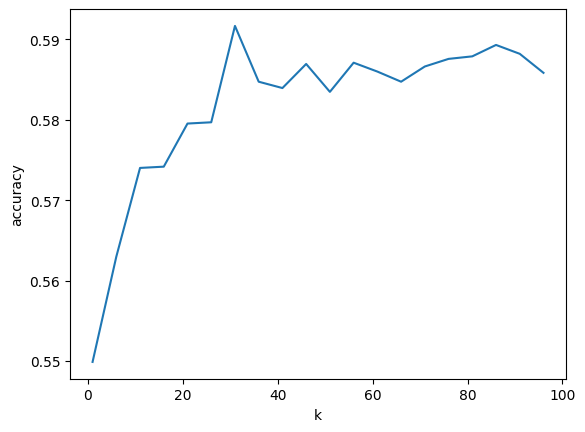

Time taken to train the model:  0.002134561538696289
Binary cross entropy: 14.751123123683334
Accuracy: 0.5907428427292218


0.5907428427292218

In [9]:
def get_model(param):
    return KNeighborsClassifier(n_neighbors=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 100, 5), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'k', 'accuracy')
best_model = get_model(best_param)

accuracy_KNN_sk = test_model(best_model, train, test, classification=True)

In [10]:
regressor = ScratchKNeighbors(classification=True, n_neighbors=5)
accuracy_KNN_my = test_model(regressor, train, test, classification=True)

Time taken to train the model:  3.337860107421875e-06
Binary cross entropy: 15.382989414651588
Accuracy: 0.5732122587968218


0.5732122587968218

# KNN regression

In [18]:
df, train, test, val = get_data(normalize=False, binary_label=False)


## Sklearn

In [19]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)

test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.0016429424285888672
Root Mean Squared Error: 9314.63167163207


9314.63167163207

Trying hyperparameters: 1
Time taken to train the model:  0.0016160011291503906
Root Mean Squared Error: 15225.924163065538
Value: 15225.924163065538
Trying hyperparameters: 6
Time taken to train the model:  0.001226663589477539
Root Mean Squared Error: 8490.828485311627
Value: 8490.828485311627
Trying hyperparameters: 11
Time taken to train the model:  0.0011429786682128906
Root Mean Squared Error: 8055.688675956313
Value: 8055.688675956313
Trying hyperparameters: 16
Time taken to train the model:  0.0012941360473632812
Root Mean Squared Error: 7846.124723319356
Value: 7846.124723319356
Trying hyperparameters: 21
Time taken to train the model:  0.0011665821075439453
Root Mean Squared Error: 7810.077348671558
Value: 7810.077348671558
Trying hyperparameters: 26
Time taken to train the model:  0.0012354850769042969
Root Mean Squared Error: 7724.9434767499315
Value: 7724.9434767499315
Trying hyperparameters: 31
Time taken to train the model:  0.001165628433227539
Root Mean Squared Error: 

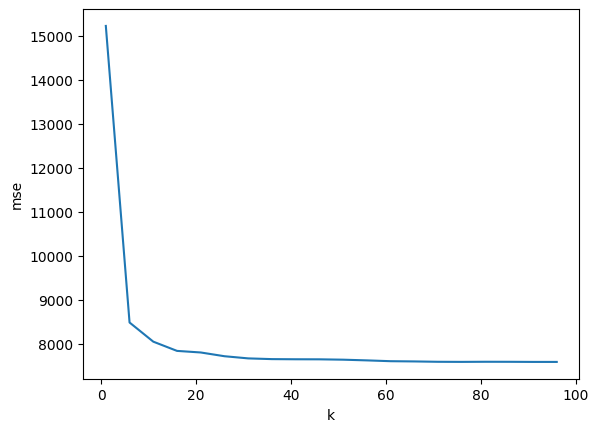

Time taken to train the model:  0.001542806625366211
Root Mean Squared Error: 9314.63167163207


In [20]:
def get_model(param):
    return KNeighborsRegressor(n_neighbors=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 100, 5), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'k', 'mse')
best_model = get_model(best_param)

rmse_KNN_sk = test_model(regressor, train, test, classification=False)

In [21]:
regressor = ScratchKNeighbors(classification=False, n_neighbors=5)
rmse_KNN_my = test_model(regressor, train, test, classification=False)


Time taken to train the model:  2.1457672119140625e-06
Root Mean Squared Error: 9314.63167163207


9314.63167163207

In [30]:
class ScratchLocallyWeightedLinearRegression:
    def __init__(self, num_iter, lr, kernel_func, kernel_func_params):
        self.num_iter = num_iter
        self.lr = lr
        self.kernel_func = kernel_func
        self.kernel_func_params = kernel_func_params
        self.w = None

    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1])
        for i in range(self.num_iter):
            for j in range(X.shape[0]):
                x = X[j]
                y_pred = self.predict(x)
                error = y[j] - y_pred
                k = self.kernel_func(x, X, self.kernel_func_params)

                # self.w += self.lr * error * k
                # self.w+=self.lr *error * np.dot(k,x)

                self.w += self.lr * np.dot(error, k)

    def predict(self, X):
        return np.dot(X, self.w)


def gaussian_kernel(x, X, params):
    sigma = params['sigma']
    distances = np.linalg.norm(x - X, axis=1)
    return np.exp(-distances ** 2 / (2 * sigma ** 2))


regressor = ScratchLocallyWeightedLinearRegression(num_iter=100, lr=0.01, kernel_func=gaussian_kernel,
                                                   kernel_func_params={'sigma': 1})

test_model(regressor, train_x, train_y, test_x, test_y)

ValueError: operands could not be broadcast together with shapes (58,) (31715,) (58,) 

In [1]:
from utils import *


# Linear/Logistic Classification

In [7]:
df, train, test, val = get_data(normalize=True, binary_label=True)

In [8]:
from sklearn.linear_model import SGDClassifier

In [5]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))


class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5, logistic=False,
                 classification=True):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio
        self.classification = classification
        self.model = 'logistic' if logistic else 'perceptron'  #todo check

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.classification:
                if self.model == 'logistic':
                    y_pred = _sigmoid(y_pred)
                else:
                    y_pred = np.where(y_pred>=0, 1, 0)
            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param

            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        if self.classification:
            if self.model == 'logistic':
                y_pred = _sigmoid(y_pred)
                y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
            else:
                y_pred = [1 if i >= 0 else 0 for i in y_pred]
        return y_pred

## No regularization

### Sklearn

In [10]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                          early_stopping=False, loss='perceptron')
accuracy_LC_NR_sk=test_model(regressor, train, test, classification=True)

Time taken to train the model:  0.016450881958007812
Binary cross entropy: 16.48307317302797
Accuracy: 0.5426913860512045


0.5426913860512045

### Scratch

In [11]:
#No regularization
regressor = ScratchLinearRegression(regularization='',classification=True)
accuracy_LC_NR_my=test_model(regressor, train, test, classification=True)

Time taken to train the model:  1.1781249046325684
Binary cross entropy: 15.078420770803579
Accuracy: 0.5816622524908563


0.5816622524908563

### Scratch Logistic

In [14]:
#No regularization
regressor = ScratchLinearRegression(regularization='', logistic=True,classification=True)
accuracy_LO_NR_my=test_model(regressor, train, test, classification=True)

Time taken to train the model:  2.061532735824585
Binary cross entropy: 12.805520443579645
Predicted mean: 0.5627443561609282 Actual mean: 0.5353764661369655
Accuracy: 0.64472190692395


0.64472190692395

##L1

Trying hyperparameters: 0.0001
Time taken to train the model:  2.750826597213745
Binary cross entropy: 14.60384505912519
Predicted mean: 0.5527352987545325 Actual mean: 0.527825949865994
Accuracy: 0.5948289452940249
Value: 0.5948289452940249
Trying hyperparameters: 0.0002
Time taken to train the model:  1.8612961769104004
Binary cross entropy: 14.620892349077474
Predicted mean: 0.552577644647643 Actual mean: 0.527825949865994
Accuracy: 0.5943559829733565
Value: 0.5943559829733565
Trying hyperparameters: 0.0004
Time taken to train the model:  1.7373158931732178
Binary cross entropy: 14.672034218934336
Predicted mean: 0.5514740658994167 Actual mean: 0.527825949865994
Accuracy: 0.5929370960113511
Value: 0.5929370960113511
Trying hyperparameters: 0.0008
Time taken to train the model:  1.5100128650665283
Binary cross entropy: 14.711811228823
Predicted mean: 0.5506857953649693 Actual mean: 0.527825949865994
Accuracy: 0.5918335172631247
Value: 0.5918335172631247
Trying hyperparameters: 0.0016

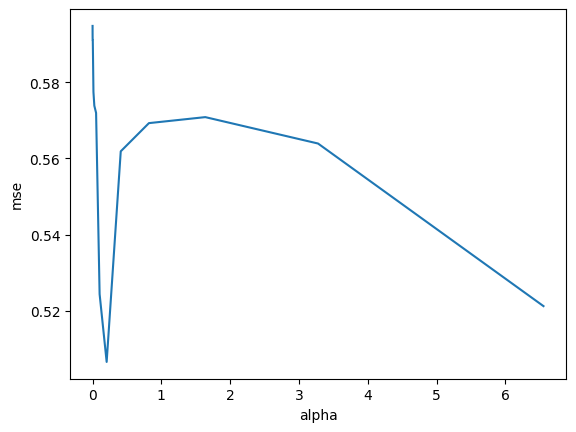

Time taken to train the model:  1.5395021438598633
Binary cross entropy: 15.105695574730266
Predicted mean: 0.5418085508891411 Actual mean: 0.5353764661369655
Accuracy: 0.5809055366376592


0.5809055366376592

In [34]:
#L1 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param,classification=True)


def iterate_hyperparameters():
    #NOTE much lower allpha than in regression
    alpha = 0.0001
    while alpha < 10:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param,classification=True)

accuracy_LC_L1_my= test_model(regressor, train, test, classification=True)


## L2

Trying hyperparameters: 0.001
Time taken to train the model:  2.6780083179473877
Binary cross entropy: 14.598162629141095
Predicted mean: 0.5510011035787482 Actual mean: 0.527825949865994
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 0.002
Time taken to train the model:  2.141244411468506
Binary cross entropy: 14.586797769172902
Predicted mean: 0.5506857953649693 Actual mean: 0.527825949865994
Accuracy: 0.5953019076146934
Value: 0.5953019076146934
Trying hyperparameters: 0.004
Time taken to train the model:  1.758847713470459
Binary cross entropy: 14.586797769172902
Predicted mean: 0.552892952861422 Actual mean: 0.527825949865994
Accuracy: 0.5953019076146934
Value: 0.5953019076146934
Trying hyperparameters: 0.008
Time taken to train the model:  1.7327992916107178
Binary cross entropy: 14.598162629141095
Predicted mean: 0.5506857953649693 Actual mean: 0.527825949865994
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 0.016
T

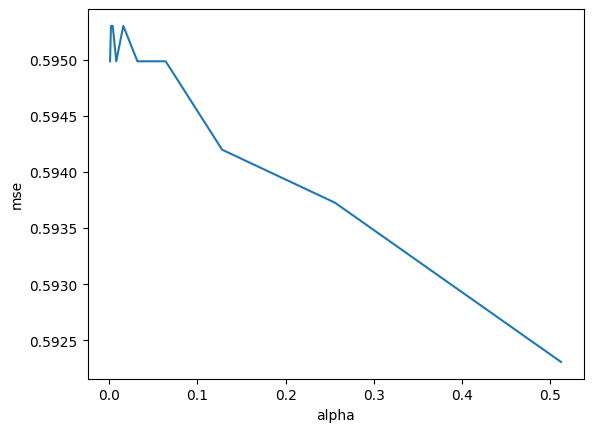

Time taken to train the model:  1.9208967685699463
Binary cross entropy: 15.082966571458027
Predicted mean: 0.5394122840206835 Actual mean: 0.5353764661369655
Accuracy: 0.5815361331819902


0.5815361331819902

In [36]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param,classification=True)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param,classification=True)

accuracy_LC_L2_my=test_model(regressor, train, test, classification=True)

In [ ]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    l1 = 1
    while l1 < 200:
        l2 = 0.001
        while l2 < 0.5:
            yield l1 / (l1 + l2)
            l2 *= 2
        l1 *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

test_model(regressor, train, test, classification=False)

Trying hyperparameters: 0.91
Time taken to train the model:  2.7852590084075928
Binary cross entropy: 15.939216105387608
Predicted mean: 0.5673971306952547 Actual mean: 0.527825949865994
Accuracy: 0.557780230174996
Value: 0.557780230174996
Trying hyperparameters: 0.92
Time taken to train the model:  1.9711158275604248
Binary cross entropy: 14.944790858170915
Predicted mean: 0.5930947501182405 Actual mean: 0.527825949865994
Accuracy: 0.5853696988806558
Value: 0.5853696988806558
Trying hyperparameters: 0.93
Time taken to train the model:  1.7620997428894043
Binary cross entropy: 15.85397965562618
Predicted mean: 0.5653476273056913 Actual mean: 0.527825949865994
Accuracy: 0.5601450417783383
Value: 0.5601450417783383
Trying hyperparameters: 0.9400000000000001
Time taken to train the model:  2.1351194381713867
Binary cross entropy: 15.4562095567395
Predicted mean: 0.5770140312155132 Actual mean: 0.527825949865994
Accuracy: 0.5711808292606022
Value: 0.5711808292606022
Trying hyperparameters:

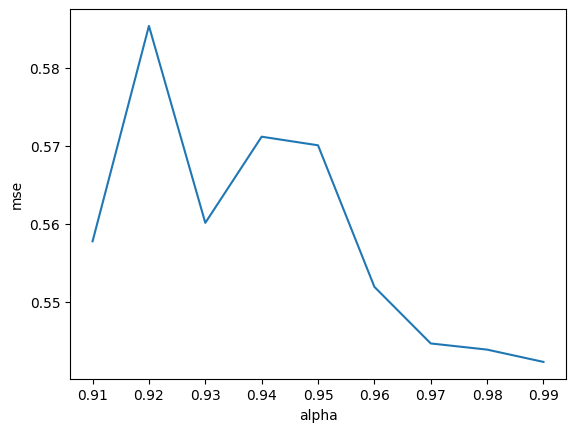

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [38]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param,classification=True)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    for a in range(1, 10):
        yield 0.9 + a / 100


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=params,classification=True)

test_model(regressor, train, test, classification=True)

Trying hyperparameters: (0.01, 0.5)
Time taken to train the model:  2.0727579593658447
Binary cross entropy: 14.899331418298152
Predicted mean: 0.5489516001891849 Actual mean: 0.527825949865994
Accuracy: 0.5866309317357717
Value: 0.5866309317357717
Trying hyperparameters: (0.01, 0.6)
Time taken to train the model:  1.5396637916564941
Binary cross entropy: 14.916378708250436
Predicted mean: 0.5453255557307268 Actual mean: 0.527825949865994
Accuracy: 0.5861579694151032
Value: 0.5861579694151032
Trying hyperparameters: (0.01, 0.7)
Time taken to train the model:  2.1990439891815186
Binary cross entropy: 14.950473288155008
Predicted mean: 0.5456408639445057 Actual mean: 0.527825949865994
Accuracy: 0.5852120447737663
Value: 0.5852120447737663
Trying hyperparameters: (0.01, 0.8)
Time taken to train the model:  2.2234437465667725
Binary cross entropy: 15.018662447964154
Predicted mean: 0.5472174050134005 Actual mean: 0.527825949865994
Accuracy: 0.5833201954910926
Value: 0.5833201954910926
Tryi

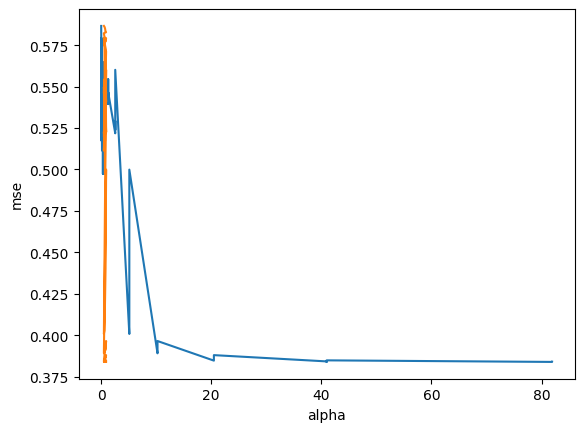

Time taken to train the model:  1.6133451461791992
Binary cross entropy: 15.387535215306034
Predicted mean: 0.5367637785344936 Actual mean: 0.5353764661369655
Accuracy: 0.5730861394879556


0.5730861394879556

In [39]:
#Elastic net regularization

def get_model(param):
    a, b = param
    return ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b,classification=True)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    a = 0.01
    while a < 100:
        for b in range(5, 10):
            yield a, b / 10
        a *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
a, b = best_param
regressor = ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b,classification=True)

test_model(regressor, train, test, classification=True)

# Logistic Classifier

In [41]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=1000, penalty=None)
test_model(regressor, train, test, classification=True)

Time taken to train the model:  1.7899055480957031
Binary cross entropy: 12.673692224600657
Predicted mean: 0.5593391348215412 Actual mean: 0.5353764661369655
Accuracy: 0.6483793668810695


0.6483793668810695

In [42]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                          early_stopping=False, loss='log_loss')
test_model(regressor, train, test, classification=True)


Time taken to train the model:  0.18259286880493164
Binary cross entropy: 12.86007005143302
Predicted mean: 0.5589607768949426 Actual mean: 0.5353764661369655
Accuracy: 0.6432084752175558


0.6432084752175558

Trying hyperparameters: 0.0001
Time taken to train the model:  1.8664917945861816
Binary cross entropy: 12.654771574580469
Predicted mean: 0.5815860003153082 Actual mean: 0.527825949865994
Accuracy: 0.6489043039571181
Value: 0.6489043039571181
Trying hyperparameters: 0.0002
Time taken to train the model:  1.8464951515197754
Binary cross entropy: 12.632041854644086
Predicted mean: 0.5812706921015293 Actual mean: 0.527825949865994
Accuracy: 0.649534920384676
Value: 0.649534920384676
Trying hyperparameters: 0.0004
Time taken to train the model:  2.0488290786743164
Binary cross entropy: 12.620676994675895
Predicted mean: 0.5812706921015293 Actual mean: 0.527825949865994
Accuracy: 0.649850228598455
Value: 0.649850228598455
Trying hyperparameters: 0.0008
Time taken to train the model:  1.7889113426208496
Binary cross entropy: 12.632041854644084
Predicted mean: 0.5819013085290872 Actual mean: 0.527825949865994
Accuracy: 0.649534920384676
Value: 0.649534920384676
Trying hyperparameters: 0.0016

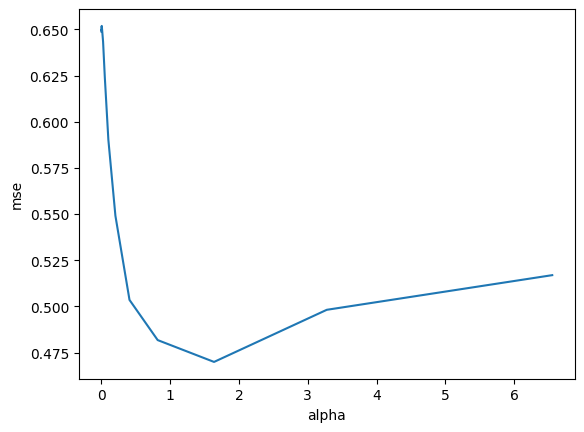

Time taken to train the model:  1.8615195751190186
Binary cross entropy: 12.773699838998509
Predicted mean: 0.573968974650019 Actual mean: 0.5353764661369655
Accuracy: 0.6456047420860134


0.6456047420860134

In [40]:
#L1 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param,classification=True,logistic=True)


def iterate_hyperparameters():
    #NOTE much lower allpha than in regression
    alpha = 0.0001
    while alpha < 10:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param,classification=True,logistic=True)

test_model(regressor, train, test, classification=True)

Trying hyperparameters: 0.001
Time taken to train the model:  2.3747479915618896
Binary cross entropy: 12.666136434548655
Predicted mean: 0.5806400756739714 Actual mean: 0.527825949865994
Accuracy: 0.6485889957433392
Value: 0.6485889957433392
Trying hyperparameters: 0.002
Time taken to train the model:  1.9306294918060303
Binary cross entropy: 12.654771574580467
Predicted mean: 0.5806400756739714 Actual mean: 0.527825949865994
Accuracy: 0.6489043039571181
Value: 0.6489043039571181
Trying hyperparameters: 0.004
Time taken to train the model:  2.056212902069092
Binary cross entropy: 12.654771574580467
Predicted mean: 0.5800094592464133 Actual mean: 0.527825949865994
Accuracy: 0.6489043039571181
Value: 0.6489043039571181
Trying hyperparameters: 0.008
Time taken to train the model:  2.138327121734619
Binary cross entropy: 12.62635942465999
Predicted mean: 0.5798518051395238 Actual mean: 0.527825949865994
Accuracy: 0.6496925744915655
Value: 0.6496925744915655
Trying hyperparameters: 0.016
T

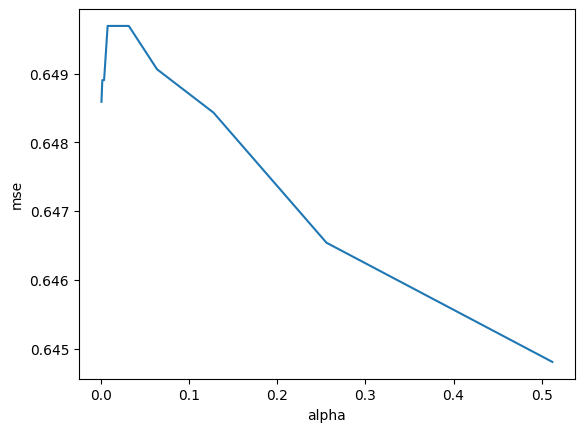

Time taken to train the model:  1.707129955291748
Binary cross entropy: 12.819157845542989
Predicted mean: 0.5641316685584563 Actual mean: 0.5353764661369655
Accuracy: 0.6443435489973515


0.6443435489973515

In [43]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param,classification=True,logistic=True)


def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param,classification=True,logistic=True)

test_model(regressor, train, test, classification=True)

In [1]:
from utils import *

# Linear Regression

In [2]:
df, train, test, val = get_data(normalize=True, binary_label=False)

## Sklearn

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
test_model(regressor, train, test, classification=False)
#works also with not normalized data

Time taken to train the model:  0.07786178588867188
Root Mean Squared Error: 8273.862920013378


8273.862920013378

In [6]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False)
rmse_LR_NL_sk = test_model(regressor, train, test, classification=False)


Time taken to train the model:  2.816441297531128
Root Mean Squared Error: 8275.739371762584


/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


8275.739371762584

## Analytical Linear Regression From Scratch

In [4]:
class ScratchLinearRegressionAnalytical:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.weights)


test_model(ScratchLinearRegressionAnalytical(), train, test, classification=False)
#works really poorly with not normalized data
#Why worse than sklearn?

Time taken to train the model:  0.10507583618164062
Root Mean Squared Error: 8310.886013705811


8310.886013705811

### Scratch

In [7]:
class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param

            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [8]:
#No regularization
regressor = ScratchLinearRegression(regularization='')

rmse_LR_NL_my = test_model(regressor, train, test, classification=False)



Time taken to train the model:  1.9783906936645508
Root Mean Squared Error: 8281.584927801572


8281.584927801572

## L1 regularization

### Sklearn

In [9]:

regressor = SGDRegressor(max_iter=1000, penalty='l1', learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False, alpha=100)
rmse_LR_L1_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  4.953240156173706
Root Mean Squared Error: 8251.875504985122


8251.875504985122

### Scratch

Trying hyperparameters: 0.1
Time taken to train the model:  1.237609624862671
Root Mean Squared Error: 7485.112666374343
Value: 7485.112666374343
Trying hyperparameters: 0.2
Time taken to train the model:  1.1504673957824707
Root Mean Squared Error: 7484.96648216334
Value: 7484.96648216334
Trying hyperparameters: 0.4
Time taken to train the model:  1.0326995849609375
Root Mean Squared Error: 7484.705585117933
Value: 7484.705585117933
Trying hyperparameters: 0.8
Time taken to train the model:  0.9613890647888184
Root Mean Squared Error: 7484.280579452767
Value: 7484.280579452767
Trying hyperparameters: 1.6
Time taken to train the model:  1.174980640411377
Root Mean Squared Error: 7483.790943200983
Value: 7483.790943200983
Trying hyperparameters: 3.2
Time taken to train the model:  0.888512134552002
Root Mean Squared Error: 7483.222028489958
Value: 7483.222028489958
Trying hyperparameters: 6.4
Time taken to train the model:  0.8997609615325928
Root Mean Squared Error: 7482.166399702954
V

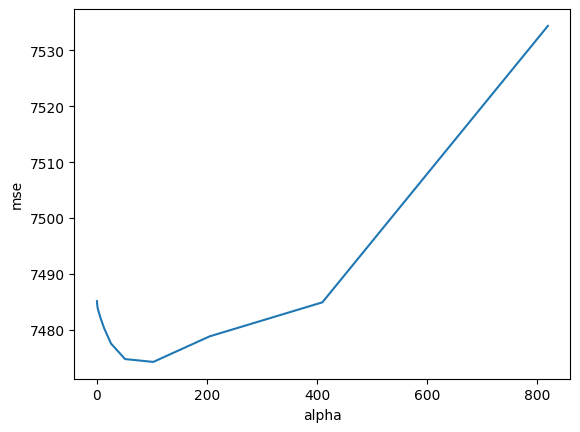

Time taken to train the model:  0.9750137329101562
Root Mean Squared Error: 8251.90777476523


8251.90777476523

In [10]:
def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha
    alpha = 0.1
    while alpha < 1000:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param)

rmse_LR_L1_my = test_model(regressor, train, test, classification=False)


##  L2 regularization

### Sklearn

In [11]:
regressor = SGDRegressor(max_iter=1000, penalty='l2', learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False, alpha=0.5)
rmse_LR_L2_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.3261148929595947
Root Mean Squared Error: 8266.18668587692


8266.18668587692

### Scratch

Trying hyperparameters: 0.001
Time taken to train the model:  1.7572405338287354
Root Mean Squared Error: 7484.88229219937
Value: 7484.88229219937
Trying hyperparameters: 0.002
Time taken to train the model:  0.962794303894043
Root Mean Squared Error: 7484.502882453825
Value: 7484.502882453825
Trying hyperparameters: 0.004
Time taken to train the model:  1.0192441940307617
Root Mean Squared Error: 7483.7728705543095
Value: 7483.7728705543095
Trying hyperparameters: 0.008
Time taken to train the model:  1.1388885974884033
Root Mean Squared Error: 7482.4243387325205
Value: 7482.4243387325205
Trying hyperparameters: 0.016
Time taken to train the model:  0.9468450546264648
Root Mean Squared Error: 7480.145248096583
Value: 7480.145248096583
Trying hyperparameters: 0.032
Time taken to train the model:  0.8320643901824951
Root Mean Squared Error: 7477.061750689474
Value: 7477.061750689474
Trying hyperparameters: 0.064
Time taken to train the model:  0.8471739292144775
Root Mean Squared Error:

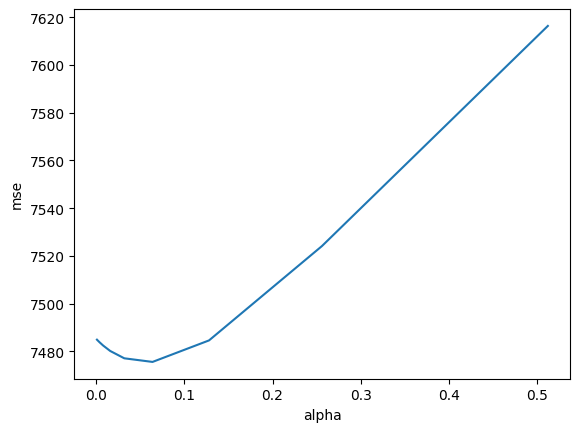

Time taken to train the model:  0.8692269325256348
Root Mean Squared Error: 8270.084734322667


8270.084734322667

In [12]:
#L2 regularization
def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param)

rmse_LR_L2_my = test_model(regressor, train, test, classification=False)

## Elastic net regularization

### Sklearn

In [13]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.2)
rmse_LR_EL_sk = test_model(model, train, test, classification=False)

Time taken to train the model:  2.3944180011749268
Root Mean Squared Error: 8274.942072408272


8274.942072408272

In [14]:
model = SGDRegressor(max_iter=1000, penalty='elasticnet', learning_rate='constant', shuffle=False, eta0=0.00001,
                     early_stopping=False, alpha=0.5, l1_ratio=0.5)
rmse_LR_EL_sk = test_model(model, train, test, classification=False)

Time taken to train the model:  1.6386034488677979
Root Mean Squared Error: 8269.28193026024


8269.28193026024

### Scratch

Trying hyperparameters: 0.9990009990009991
Time taken to train the model:  2.0301804542541504
Mean Squared Error: 56006295.459590904
Root Mean Squared Error: 7483.735394813936
R-squared Score: 0.020662906978738738
Value: 56006295.459590904
Trying hyperparameters: 0.998003992015968
Time taken to train the model:  1.2977888584136963
Mean Squared Error: 56000627.83486049
Root Mean Squared Error: 7483.3567224114395
R-squared Score: 0.020762012179007194
Value: 56000627.83486049
Trying hyperparameters: 0.9960159362549801
Time taken to train the model:  1.377115249633789
Mean Squared Error: 55989746.36672418
Root Mean Squared Error: 7482.629642493619
R-squared Score: 0.02095228767009205
Value: 55989746.36672418
Trying hyperparameters: 0.9920634920634921
Time taken to train the model:  1.4177486896514893
Mean Squared Error: 55969809.10386689
Root Mean Squared Error: 7481.297287494121
R-squared Score: 0.021300914568001206
Value: 55969809.10386689
Trying hyperparameters: 0.984251968503937
Time t

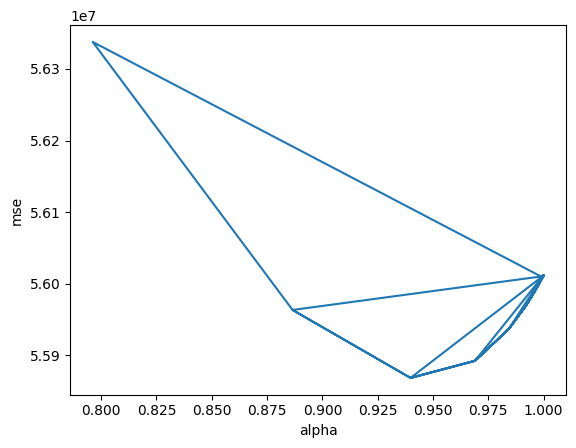

Time taken to train the model:  1.145259141921997
Mean Squared Error: 68387676.64274618
Root Mean Squared Error: 8269.684192443276
R-squared Score: 0.03134081491081331


68387676.64274618

In [13]:
def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    l1 = 1
    while l1 < 200:
        l2 = 0.001
        while l2 < 0.5:
            yield l1 / (l1 + l2)
            l2 *= 2
        l1 *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

Trying hyperparameters: 0.91
Time taken to train the model:  1.3808584213256836
Mean Squared Error: 55904913.86416126
Root Mean Squared Error: 7476.958864682971
R-squared Score: 0.022435685487639745
Value: 55904913.86416126
Trying hyperparameters: 0.92
Time taken to train the model:  1.1047961711883545
Mean Squared Error: 55887276.51624723
Root Mean Squared Error: 7475.779325010018
R-squared Score: 0.022744095620697014
Value: 55887276.51624723
Trying hyperparameters: 0.93
Time taken to train the model:  1.0943922996520996
Mean Squared Error: 55875007.554799184
Root Mean Squared Error: 7474.958699203574
R-squared Score: 0.022958633092606373
Value: 55875007.554799184
Trying hyperparameters: 0.9400000000000001
Time taken to train the model:  1.1066339015960693
Mean Squared Error: 55868637.835250504
Root Mean Squared Error: 7474.5326165085735
R-squared Score: 0.023070015260896137
Value: 55868637.835250504
Trying hyperparameters: 0.9500000000000001
Time taken to train the model:  1.27178716

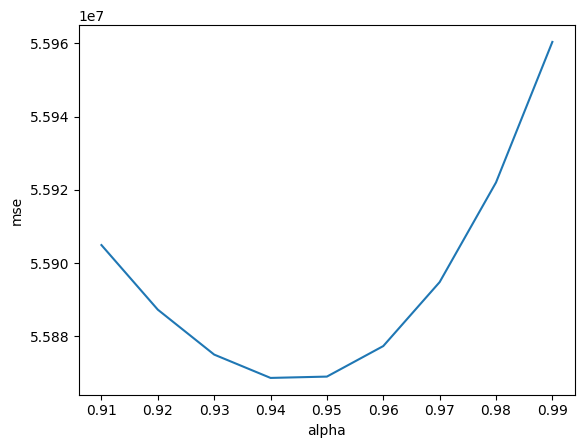

Time taken to train the model:  1.1934008598327637
Mean Squared Error: 68387703.38223955
Root Mean Squared Error: 8269.685809161045
R-squared Score: 0.031340436166321206


68387703.38223955

In [14]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    for a in range(1, 10):
        yield 0.9 + a / 100


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

Trying hyperparameters: (0.01, 0.5)
Time taken to train the model:  1.8538179397583008
Mean Squared Error: 56001486.63726316
Root Mean Squared Error: 7483.414103018966
R-squared Score: 0.020746994991357015
Value: 56001486.63726316
Trying hyperparameters: (0.01, 0.6)
Time taken to train the model:  1.1796128749847412
Mean Squared Error: 56006714.014235385
Root Mean Squared Error: 7483.763359048399
R-squared Score: 0.020655588049939166
Value: 56006714.014235385
Trying hyperparameters: (0.01, 0.7)
Time taken to train the model:  1.4242687225341797
Mean Squared Error: 56012081.66403663
Root Mean Squared Error: 7484.1219701469745
R-squared Score: 0.02056172827025593
Value: 56012081.66403663
Trying hyperparameters: (0.01, 0.8)
Time taken to train the model:  1.2425601482391357
Mean Squared Error: 56017591.62969057
Root Mean Squared Error: 7484.490071453804
R-squared Score: 0.020465379927593785
Value: 56017591.62969057
Trying hyperparameters: (0.01, 0.9)
Time taken to train the model:  1.1882

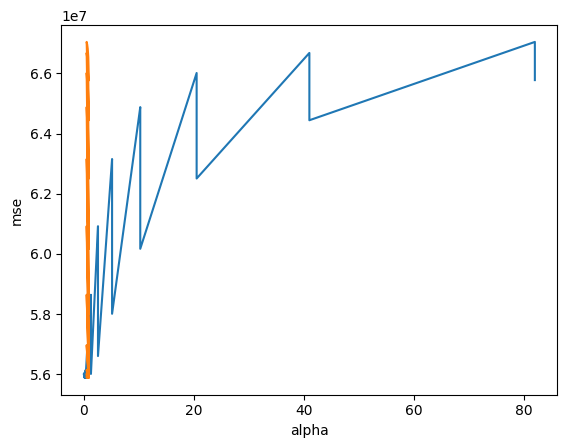

Time taken to train the model:  2.4938156604766846
Mean Squared Error: 68390149.31812192
Root Mean Squared Error: 8269.833693498433
R-squared Score: 0.031305791353470114


68390149.31812192

In [19]:
#Elastic net regularization

def get_model(param):
    a, b = param
    return ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    a = 0.01
    while a < 100:
        for b in range(5, 10):
            yield a, b / 10
        a *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
a, b = best_param
regressor = ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

In [1]:
from utils import *

# Neural Network

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)


class ScratchNeuralNetwork:

    def __init__(self, input_dim, hidden_dim, learning_rate=0.01, classification=False, epochs=10):
        self.W1 = np.random.rand(input_dim, hidden_dim)
        self.W2 = np.random.rand(hidden_dim, 1)
        self.b1 = np.zeros((1, hidden_dim))
        self.b2 = np.zeros((1, 1))
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_dim = hidden_dim
        self.classification = classification
        self.activation = sigmoid if classification else relu
        self.activation_derivative = sigmoid_derivative if classification else relu_derivative
        self.hidden_output = None

    def forward(self, X):
        self.hidden_output = self.activation(np.dot(X, self.W1) + self.b1)
        output = np.dot(self.hidden_output, self.W2) + self.b2
        return self.activation(output)

    def backward(self, X, y, output):
        error = (output - y)
        error /= X.shape[0]  #divide by batch size?
        if not self.classification:
            error = error * self.activation_derivative(output)
        d_weights2 = np.dot(self.hidden_output.T, error)
        d_bias2 = np.sum(error, axis=0, keepdims=True)

        d_hidden_output = np.dot(error, self.W2.T) * self.activation_derivative(self.hidden_output)
        d_weights1 = np.dot(X.T, d_hidden_output)
        d_bias1 = np.sum(d_hidden_output, axis=0, keepdims=True)

        lr = self.learning_rate

        self.W2 -= lr * d_weights2
        self.b2 -= lr * d_bias2
        self.W1 -= lr * d_weights1
        self.b1 -= lr * d_bias1

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        for i in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(output - y))
            print("Epoch ", i, " loss: ", loss)

    def predict(self, X):
        y_pred = self.forward(X)
        if self.classification:
            return np.where(y_pred > 0.5, 1, 0)
        else:
            return y_pred

## Regression

In [3]:
df, train, test, val = get_data(normalize=True, binary_label=False)

### sklearn

In [4]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    # solver='sgd',
    alpha=0.0000,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    shuffle=True,
    random_state=1,
    verbose=True,
    # momentum=0.3
    max_iter=100,
)
rmse_NN_sk = test_model(regressor, train, test, classification=False)

Iteration 1, loss = 93498697.77038790
Iteration 2, loss = 93432062.40464759
Iteration 3, loss = 93293548.64018172
Iteration 4, loss = 93069953.35270239
Iteration 5, loss = 92760638.93848751
Iteration 6, loss = 92382787.90908296
Iteration 7, loss = 91956352.08388145
Iteration 8, loss = 91499833.44672398
Iteration 9, loss = 91026719.75822501
Iteration 10, loss = 90560136.70846792
Iteration 11, loss = 90113265.94776164
Iteration 12, loss = 89693504.91610427
Iteration 13, loss = 89308666.07409894
Iteration 14, loss = 88956998.48968241
Iteration 15, loss = 88642001.42838758
Iteration 16, loss = 88357171.21842405
Iteration 17, loss = 88105014.00186810
Iteration 18, loss = 87878828.59345932
Iteration 19, loss = 87678595.18919952
Iteration 20, loss = 87503312.44308227
Iteration 21, loss = 87349442.94160980
Iteration 22, loss = 87210534.23690429
Iteration 23, loss = 87088145.65057297
Iteration 24, loss = 86977647.78264335
Iteration 25, loss = 86881830.21974926
Iteration 26, loss = 86793663.0772

/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


8289.592600106917

### scratch

In [5]:
df, train, test, val = get_data(normalize=True, binary_label=False)
my_regressor = ScratchNeuralNetwork(input_dim=58, hidden_dim=100, learning_rate=0.00001, epochs=100,
                                    classification=False)
rmse_NN_my = test_model(my_regressor, train, test, classification=False)

Epoch  0  loss:  186243269.33690143
Epoch  1  loss:  186098971.6551389
Epoch  2  loss:  185953268.77152896
Epoch  3  loss:  185805562.18485543
Epoch  4  loss:  185655276.40027347
Epoch  5  loss:  185501903.7962325
Epoch  6  loss:  185345014.663702
Epoch  7  loss:  185184228.3953833
Epoch  8  loss:  185019193.37229562
Epoch  9  loss:  184849648.7311762
Epoch  10  loss:  184675408.003681
Epoch  11  loss:  184496362.45869714
Epoch  12  loss:  184312475.37868577
Epoch  13  loss:  184123754.16902584
Epoch  14  loss:  183930300.89547917
Epoch  15  loss:  183732305.46564612
Epoch  16  loss:  183529959.26958907
Epoch  17  loss:  183323709.1415077
Epoch  18  loss:  183113970.56385392
Epoch  19  loss:  182901188.40310147
Epoch  20  loss:  182685964.25758746
Epoch  21  loss:  182468891.09314483
Epoch  22  loss:  182250663.6319432
Epoch  23  loss:  182031999.17468348
Epoch  24  loss:  181813643.35858518
Epoch  25  loss:  181596302.9346728
Epoch  26  loss:  181380789.07297626
Epoch  27  loss:  1811

8427.343324827922

## Classification

In [6]:
df, train, test, val = get_data(normalize=True, binary_label=True)

### sklearn

In [10]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic',
    learning_rate_init=0.001,
    max_iter=100,
)
accuracy_NN_sk = test_model(classifier, train, test, classification=True)

Time taken to train the model:  18.518577575683594
Binary cross entropy: 12.423673188606026
Predicted mean: 0.5521503342161685 Actual mean: 0.5353764661369655
Accuracy: 0.6553159288687098


/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6553159288687098

### scratch

In [67]:
my_regressor = ScratchNeuralNetwork(input_dim=58, hidden_dim=250, learning_rate=0.1, epochs=200, classification=True)
accuracy_NN_my = test_model(my_regressor, train, test, classification=True)

Epoch  0  loss:  0.45056166141658377
Epoch  1  loss:  0.44984796947303635
Epoch  2  loss:  0.4490844013451975
Epoch  3  loss:  0.4482651134548795
Epoch  4  loss:  0.4473833036835954
Epoch  5  loss:  0.4464310065469873
Epoch  6  loss:  0.4453988357995212
Epoch  7  loss:  0.44427565953025044
Epoch  8  loss:  0.44304818773300764
Epoch  9  loss:  0.44170044459285174
Epoch  10  loss:  0.4402130850742823
Epoch  11  loss:  0.4385624933487692
Epoch  12  loss:  0.43671956043196697
Epoch  13  loss:  0.4346479636023581
Epoch  14  loss:  0.4323016305266573
Epoch  15  loss:  0.42962081302463123
Epoch  16  loss:  0.42652572778429476
Epoch  17  loss:  0.42290589860215877
Epoch  18  loss:  0.4186019787309408
Epoch  19  loss:  0.4133750818117468
Epoch  20  loss:  0.40685884047239707
Epoch  21  loss:  0.39849973210262707
Epoch  22  loss:  0.38751185379717884
Epoch  23  loss:  0.37284637650780855
Epoch  24  loss:  0.35329612570660246
Epoch  25  loss:  0.3288191199312176
Epoch  26  loss:  0.30429191056181

0.6282002774624795

Trying hyperparameters: 100
Epoch  0  loss:  0.43946315923178947
Epoch  1  loss:  0.4368242706479235
Epoch  2  loss:  0.433836907623429
Epoch  3  loss:  0.43042468156088964
Epoch  4  loss:  0.4264818134397438
Epoch  5  loss:  0.42185645998021576
Epoch  6  loss:  0.41632436169298914
Epoch  7  loss:  0.4095497562054382
Epoch  8  loss:  0.40103199667415446
Epoch  9  loss:  0.3900339597047615
Epoch  10  loss:  0.37546256256708954
Epoch  11  loss:  0.355573544362571
Epoch  12  loss:  0.3270970804037427
Epoch  13  loss:  0.28612584913135986
Epoch  14  loss:  0.26621837721958225
Epoch  15  loss:  0.2644431828312395
Epoch  16  loss:  0.2631765000145676
Epoch  17  loss:  0.2618267777471076
Epoch  18  loss:  0.26059449524062256
Epoch  19  loss:  0.25938135607967766
Epoch  20  loss:  0.2582268162794511
Epoch  21  loss:  0.2571113790550144
Epoch  22  loss:  0.25604187500985676
Epoch  23  loss:  0.2550133679135551
Epoch  24  loss:  0.25402619070824006
Epoch  25  loss:  0.2530782501310043
Epoch  26 

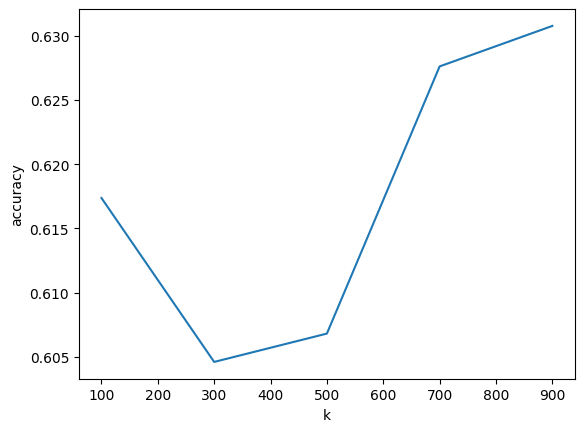

Epoch  0  loss:  0.4578349568922151
Epoch  1  loss:  0.4573587672264122
Epoch  2  loss:  0.45680949279062794
Epoch  3  loss:  0.4561543399016594
Epoch  4  loss:  0.4553444991464062
Epoch  5  loss:  0.45430615762317206
Epoch  6  loss:  0.452924695915888
Epoch  7  loss:  0.4510137613977978
Epoch  8  loss:  0.4482436301294876
Epoch  9  loss:  0.4439393544303865
Epoch  10  loss:  0.4364281441474834
Epoch  11  loss:  0.42024459616868454
Epoch  12  loss:  0.3668301404013627
Epoch  13  loss:  0.4598775711539172
Epoch  14  loss:  0.3963310173571891
Epoch  15  loss:  0.31181031365304807
Epoch  16  loss:  0.5028399964849875
Epoch  17  loss:  0.39214944372268684
Epoch  18  loss:  0.3056492316545478
Epoch  19  loss:  0.49360591253298486
Epoch  20  loss:  0.3955884282979783
Epoch  21  loss:  0.3071789443086307
Epoch  22  loss:  0.49972946887168423
Epoch  23  loss:  0.3926733365034801
Epoch  24  loss:  0.30210452086617096
Epoch  25  loss:  0.4918735800599203
Epoch  26  loss:  0.39522421393402635
Epo

0.48265859503089925

In [17]:
def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=param, learning_rate=0.2, epochs=100, classification=True)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(100, 1000, 200), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'k', 'accuracy')
best_model = get_model(param=best_param)

accuracy_NN_my = test_model(best_model, train, test, classification=True)

Trying hyperparameters: 0.01
Epoch  0  loss:  0.4350601872707736
Epoch  1  loss:  0.43491163145829836
Epoch  2  loss:  0.43476218644601194
Epoch  3  loss:  0.43461184382575163
Epoch  4  loss:  0.4344605950686487
Epoch  5  loss:  0.43430843152291393
Epoch  6  loss:  0.43415534441157405
Epoch  7  loss:  0.43400132483016096
Epoch  8  loss:  0.43384636374435087
Epoch  9  loss:  0.433690451987552
Epoch  10  loss:  0.43353358025844185
Epoch  11  loss:  0.43337573911845007
Epoch  12  loss:  0.43321691898918746
Epoch  13  loss:  0.4330571101498197
Epoch  14  loss:  0.43289630273438434
Epoch  15  loss:  0.43273448672904974
Epoch  16  loss:  0.4325716519693142
Epoch  17  loss:  0.43240778813714564
Epoch  18  loss:  0.4322428847580584
Epoch  19  loss:  0.4320769311981271
Epoch  20  loss:  0.43190991666093587
Epoch  21  loss:  0.4317418301844616
Epoch  22  loss:  0.43157266063788924
Epoch  23  loss:  0.43140239671835884
Epoch  24  loss:  0.43123102694764154
Epoch  25  loss:  0.4310585396687437
Epo

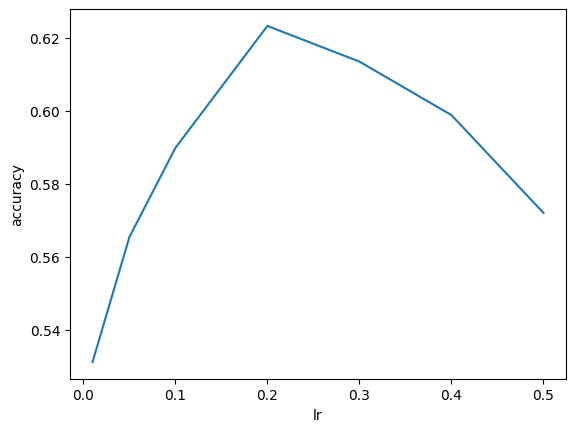

Epoch  0  loss:  0.438479717743933
Epoch  1  loss:  0.4357829749204466
Epoch  2  loss:  0.43274380115171496
Epoch  3  loss:  0.42928931013118427
Epoch  4  loss:  0.42532249775120146
Epoch  5  loss:  0.4207112650432621
Epoch  6  loss:  0.41527099556047853
Epoch  7  loss:  0.4087362581031845
Epoch  8  loss:  0.40071418016337146
Epoch  9  loss:  0.3906082550903353
Epoch  10  loss:  0.3774989854471186
Epoch  11  loss:  0.3599642643013764
Epoch  12  loss:  0.3357419789291866
Epoch  13  loss:  0.30051915571551824
Epoch  14  loss:  0.262298752128422
Epoch  15  loss:  0.25982734319083073
Epoch  16  loss:  0.2584879883329887
Epoch  17  loss:  0.25770543080169006
Epoch  18  loss:  0.2568511550947088
Epoch  19  loss:  0.2560836921861584
Epoch  20  loss:  0.2553124462602891
Epoch  21  loss:  0.2545720878233603
Epoch  22  loss:  0.25384626409767963
Epoch  23  loss:  0.2531414494903068
Epoch  24  loss:  0.252454239752651
Epoch  25  loss:  0.2517855941610434
Epoch  26  loss:  0.2511345425848607
Epoch

0.6177323748265859

In [18]:
def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=100, learning_rate=param, epochs=100, classification=True)


best_param, params, accuracies = optimize_hyperparameters(get_model, (0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5), train, test,
                                                          val,
                                                          classification=True)
plot_2d(params, accuracies, 'lr', 'accuracy')
best_model = get_model(param=best_param)

accuracy_NN_my = test_model(best_model, train, test, classification=True)

#TEST

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000
)
regressor = MLPRegressor(
    hidden_layer_sizes=(400, 300, 200, 20),
    activation='logistic',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    power_t=0.4,
    max_iter=500,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.8,
    beta_2=0.9,
    epsilon=1e-08,
    n_iter_no_change=20,
    max_fun=15000
)
test_model(regressor, train_x, train_y, test_x, test_y)
